## 회귀분석 실습
- boston 집값 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
data = boston.data #X
target = boston.target #Y
columns = boston.feature_names

In [23]:
data = pd.DataFrame(data, columns=columns)
print(data.shape)
data.tail()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [24]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### split

In [171]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.2)

In [172]:
x_train.shape

(404, 13)

### modeling
- "RM" 변수로만 회귀모델링

In [173]:
from sklearn.linear_model import LinearRegression
s_lr = LinearRegression()

In [174]:
x_train["RM"].shape

(404,)

In [175]:
x_train["RM"].values.reshape(-1, 1).shape

(404, 1)

In [176]:
feature_RM = x_train["RM"].values.reshape(-1, 1)

In [177]:
s_lr.fit(feature_RM, y_train)

LinearRegression()

In [178]:
y_pred = s_lr.predict(x_test["RM"].values.reshape(-1, 1))

In [179]:
from sklearn.metrics import r2_score

In [180]:
r2_score(y_test, y_pred)

0.5449562063024898

In [181]:
print('방수: ', x_test['RM'].values[:3])
print('예측값: ', y_pred[:3])
print('실제값: ', y_test[:3])

방수:  [4.368 6.326 5.972]
예측값:  [ 5.31471014 22.85680134 19.68524859]
실제값:  [ 8.8 24.4 20.3]


### graph

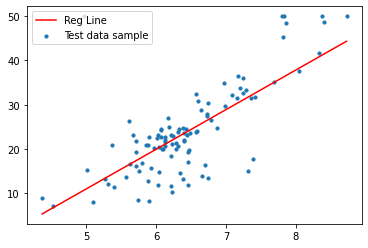

In [182]:
line_x = np.linspace(np.min(x_test["RM"]), np.max(x_test["RM"]), 10)
line_y = s_lr.predict(line_x.reshape(-1, 1))

plt.scatter(x_test["RM"], y_test, s=10)
plt.plot(line_x, line_y, c="red")
plt.legend(["Reg Line", "Test data sample"], loc='upper left')

In [183]:
print("w : {:.4f}, b : {:.4f}".format(s_lr.coef_[0], s_lr.intercept_))

w : 8.9592, b : -33.8190


---

### multiple LR
- 모든 feature 로 다중회귀

In [184]:
mul_lr = LinearRegression()
mul_lr.fit(x_train, y_train)

LinearRegression()

In [185]:
y_pred = mul_lr.predict(x_test)

In [186]:
print("다중 r2_score : {:.4f}".format(r2_score(y_test, y_pred)))

다중 r2_score : 0.7598


### weights

In [187]:
c1 = mul_lr.coef_.reshape(1, -1)
c1

array([[-1.14524145e-01,  4.73115237e-02,  2.82076583e-02,
         2.52587128e+00, -1.54622104e+01,  3.65114901e+00,
        -8.12561204e-03, -1.46493966e+00,  3.05809320e-01,
        -1.28455911e-02, -8.46599959e-01,  9.49491306e-03,
        -5.22237830e-01]])

In [188]:
for i in range(len(columns)):
    print("{:} : {:.4f}".format(columns[i], mul_lr.coef_[i]))

CRIM : -0.1145
ZN : 0.0473
INDUS : 0.0282
CHAS : 2.5259
NOX : -15.4622
RM : 3.6511
AGE : -0.0081
DIS : -1.4649
RAD : 0.3058
TAX : -0.0128
PTRATIO : -0.8466
B : 0.0095
LSTAT : -0.5222


In [189]:
c2 = pd.DataFrame(c1, columns=columns)

In [190]:
c2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.114524,0.047312,0.028208,2.525871,-15.46221,3.651149,-0.008126,-1.46494,0.305809,-0.012846,-0.8466,0.009495,-0.522238


<AxesSubplot:>

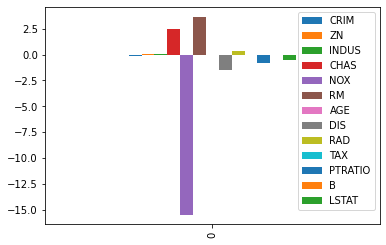

In [191]:
c2.plot.bar()

### regularization

In [192]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model

### ridge

In [193]:
ridge_lr = linear_model.Ridge(alpha=1)
ridge_lr.fit(x_train, y_train)

Ridge(alpha=1)

In [194]:
y_ridge_pred = ridge_lr.predict(x_test)
print("ridge r2_score : {:.4f}".format(r2_score(y_test, y_ridge_pred)))

ridge r2_score : 0.7531


In [195]:
c1 = ridge_lr.coef_.reshape(1, -1)
c1

array([[-1.13432193e-01,  4.89612714e-02, -8.92541962e-04,
         2.45698347e+00, -8.41408326e+00,  3.64498851e+00,
        -1.41802223e-02, -1.37300883e+00,  2.92641880e-01,
        -1.35235624e-02, -7.71423936e-01,  9.76487203e-03,
        -5.34177709e-01]])

In [196]:
for i in range(len(columns)):
    print("{:} : {:.4f}".format(columns[i], ridge_lr.coef_[i]))

CRIM : -0.1134
ZN : 0.0490
INDUS : -0.0009
CHAS : 2.4570
NOX : -8.4141
RM : 3.6450
AGE : -0.0142
DIS : -1.3730
RAD : 0.2926
TAX : -0.0135
PTRATIO : -0.7714
B : 0.0098
LSTAT : -0.5342


In [197]:
c2 = pd.DataFrame(c1, columns=columns)

In [198]:
c2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.113432,0.048961,-0.000893,2.456983,-8.414083,3.644989,-0.01418,-1.373009,0.292642,-0.013524,-0.771424,0.009765,-0.534178


<AxesSubplot:>

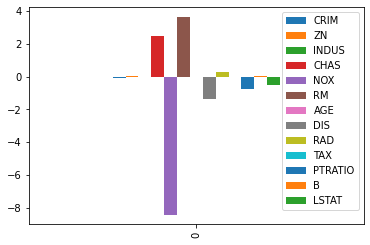

In [199]:
c2.plot.bar()

### lasso

In [200]:
lasso_lr = linear_model.Lasso(alpha=1)
lasso_lr.fit(x_train, y_train)

Lasso(alpha=1)

In [201]:
y_lasso_pred = lasso_lr.predict(x_test)
print("lasso r2_score : {:.4f}".format(r2_score(y_test, y_lasso_pred)))

lasso r2_score : 0.6553


In [202]:
c1 = lasso_lr.coef_.reshape(1, -1)
c1

array([[-0.07393112,  0.05365404, -0.        ,  0.        , -0.        ,
         0.29517214,  0.01237797, -0.80257593,  0.26800831, -0.01542917,
        -0.66223749,  0.00687045, -0.77266763]])

In [203]:
for i in range(len(columns)):
    print("{:} : {:.4f}".format(columns[i], lasso_lr.coef_[i]))

CRIM : -0.0739
ZN : 0.0537
INDUS : -0.0000
CHAS : 0.0000
NOX : -0.0000
RM : 0.2952
AGE : 0.0124
DIS : -0.8026
RAD : 0.2680
TAX : -0.0154
PTRATIO : -0.6622
B : 0.0069
LSTAT : -0.7727


In [204]:
c2 = pd.DataFrame(c1, columns=columns)

In [205]:
c2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.073931,0.053654,-0.0,0.0,-0.0,0.295172,0.012378,-0.802576,0.268008,-0.015429,-0.662237,0.00687,-0.772668


<AxesSubplot:>

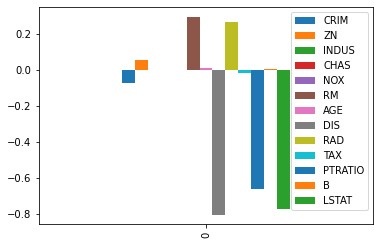

In [206]:
c2.plot.bar()

### polynomial

In [217]:
from sklearn.preprocessing import PolynomialFeatures

In [218]:
poly = PolynomialFeatures(degree=2)

In [219]:
poly_x_train = poly.fit_transform(x_train)
poly_y_train = poly.transform(x_test)